# NumPy

<https://www.numpy.org/devdocs/user/index.html>

- Numerical Python
- `pip instal numpy`
- 解決 Vectorization 的需求
- 提供新的資料結構: `ndarray`
- `import numpy as np`
- 支援 boolean filtering
- 支援不規則的 Slicing
- 很輕易地支援矩陣的運算
- 只容許單一種資料型態
    - 隱性型別轉換：`bool` < `int` < `float` < `str`

從下方網址取得所需資訊，並轉成特定型態

- 股票代號/名稱: str
- 成交價: float
- 成交張數: int

In [1]:
tse_100_url = "https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100"

In [2]:
# Pyquery 作法
import requests
from pyquery import PyQuery as pq

# GET
tse_100_url = "https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100"
r = requests.get(tse_100_url)
html_doc = r.text
# Prase
d = pq(html_doc)

In [3]:
ticker_company_names = [i.text() for i in d(".name").items()]
print(ticker_company_names )
price = [float(i.text()) for i in d(".name+ td").items()]
print(price)
volumes = [int(i.text().replace(",","")) for i in d("td:nth-child(9)").items()]
print(volumes)

['3008 大立光', '6409 旭隼', '2207 和泰車', '5269 祥碩', '6415 矽力-KY', '1476 儒鴻', '6669 緯穎', '3563 牧德', '3406 玉晶光', '1590 亞德客-KY', '2059 川湖', '2912 統一超', '2454 聯發科', '8341 日友', '2231 為升', '4137 麗豐-KY', '2227 裕日車', '8454 富邦媒', '9910 豐泰', '2327 國巨', '2049 上銀', '2395 研華', '2330 台積電', '8462 柏文', '8464 億豐', '6452 康友-KY', '9921 巨大', '1477 聚陽', '3443 創意', '2357 華碩', '1707 葡萄王', '3533 嘉澤', '2379 瑞昱', '2474 可成', '6414 樺漢', '3665 貿聯-KY', '2723 美食-KY', '6666 羅麗芬-KY', '9914 美利達', '3034 聯詠', '1256 鮮活果汁-KY', '6670 復盛應用', '3130 一零四', '8422 可寧衛', '6504 南六', '2492 華新科', '1537 廣隆', '2707 晶華', '2439 美律', '8070 長華', '4438 廣越', '4766 南寶', '6230 超眾', '4763 材料-KY', '4536 拓凱', '2404 漢唐', '5288 豐祥-KY', '1558 伸興', '8482 商億-KY', '2308 台達電', '4943 康控-KY', '1723 中碳', '2360 致茂', '3454 晶睿', '8480 泰昇-KY', '8016 矽創', '4912 聯德控股-KY', '2345 智邦', '3045 台灣大', '5871 中租-KY', '6505 台塑化', '3376 新日興', '9941 裕融', '1232 大統益', '2239 英利-KY', '3413 京鼎', '2412 中華電', '1301 台塑', '3023 信邦', '1326 台化', '6176 瑞儀', '3532 台勝科', '6533 晶心科', '6552 易華電

In [4]:
values = [float(i.text()) for i in d("td:nth-child(10)").items()]
print(values)
estimated_value = [price[i] * volumes[i] * 1000 for i in range(len(price))]
print(estimated_value)
values = [i * 100000000 for i in values]
print(values)

[19.4928, 0.0727, 4.3809, 4.4514, 1.7371, 2.4836, 11.8764, 3.207, 62.0372, 4.7916, 0.3796, 4.0318, 10.9794, 2.2546, 1.099, 2.4041, 0.8189, 0.0578, 2.4581, 14.6435, 5.0181, 1.291, 82.5715, 0.8915, 1.2588, 1.1091, 3.2379, 2.8804, 6.5593, 1.9971, 0.7814, 2.7957, 13.7511, 8.7686, 2.0469, 1.864, 0.3023, 0.2591, 1.8693, 21.8435, 0.0316, 2.3922, 0.0034, 0.0658, 0.0262, 13.1513, 0.0442, 0.8904, 4.0898, 0.1501, 0.3519, 0.695, 5.8688, 0.4794, 0.2767, 11.552, 0.3148, 0.3094, 0.2527, 9.5849, 13.0923, 0.0519, 0.5002, 6.9337, 0.018, 8.2946, 0.0812, 3.7477, 3.8618, 2.0518, 2.2237, 0.9804, 0.1953, 0.0431, 0.0523, 0.1992, 5.9284, 4.4527, 0.3898, 4.324, 2.9695, 0.5346, 0.7811, 7.751, 3.5178, 0.8718, 0.1765, 0.0502, 0.0722, 0.2875, 0.6753, 0.9942, 0.0288, 0.1721, 0.7398, 3.7858, 0.0921, 0.0801, 2.6309, 7.7302]
[1948545000.0, 7272000.0, 429093000.0, 446985000.0, 172980000.0, 247380000.0, 1189180000.0, 314394000.0, 5996941500.0, 474045000.0, 37945500.0, 399676000.0, 1094512500.0, 226548000.0, 107984000.0, 

In [5]:
# BeautifulSoup 作法
import requests
from bs4 import BeautifulSoup

r = requests.get("https://tw.stock.yahoo.com/d/i/rank.php?t=pri&e=tse&n=100")
html_str = r.text
soup = BeautifulSoup(html_str)
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [6]:
table_contents = soup.find_all("td")[2].find_all("td")[3:]
n_data = len(table_contents)
ticker_names = [table_contents[i].text for i in range(n_data) if i % 10 == 1]
prices = [float(table_contents[i].text) for i in range(n_data) if i % 10 == 2]
volumes = [int(table_contents[i].text.replace(",", "")) for i in range(n_data) if i % 10 == 8]
mkt_values = [float(table_contents[i].text)*100000000 for i in range(n_data) if i % 10 == 9]
print(ticker_names)
print(prices)
print(volumes)
print(mkt_values)

['3008 大立光', '6409 旭隼', '2207 和泰車', '5269 祥碩', '6415 矽力-KY', '1476 儒鴻', '6669 緯穎', '3563 牧德', '3406 玉晶光', '1590 亞德客-KY', '2059 川湖', '2912 統一超', '2454 聯發科', '8341 日友', '2231 為升', '4137 麗豐-KY', '2227 裕日車', '8454 富邦媒', '9910 豐泰', '2327 國巨', '2049 上銀', '2395 研華', '2330 台積電', '8462 柏文', '8464 億豐', '6452 康友-KY', '9921 巨大', '1477 聚陽', '3443 創意', '2357 華碩', '1707 葡萄王', '3533 嘉澤', '2379 瑞昱', '2474 可成', '6414 樺漢', '3665 貿聯-KY', '2723 美食-KY', '6666 羅麗芬-KY', '9914 美利達', '3034 聯詠', '1256 鮮活果汁-KY', '6670 復盛應用', '3130 一零四', '8422 可寧衛', '6504 南六', '2492 華新科', '1537 廣隆', '2707 晶華', '2439 美律', '8070 長華', '4438 廣越', '4766 南寶', '6230 超眾', '4763 材料-KY', '4536 拓凱', '2404 漢唐', '5288 豐祥-KY', '1558 伸興', '8482 商億-KY', '2308 台達電', '4943 康控-KY', '1723 中碳', '2360 致茂', '3454 晶睿', '8480 泰昇-KY', '8016 矽創', '4912 聯德控股-KY', '2345 智邦', '3045 台灣大', '5871 中租-KY', '6505 台塑化', '3376 新日興', '9941 裕融', '1232 大統益', '2239 英利-KY', '3413 京鼎', '2412 中華電', '1301 台塑', '3023 信邦', '1326 台化', '6176 瑞儀', '3532 台勝科', '6533 晶心科', '6552 易華電

In [7]:
import numpy as np
prices_arr = np.array(price)
volumes_arr = np.array(volumes)
print(type(prices_arr))
print(type(volumes_arr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [8]:
estimated_value = prices_arr * volumes_arr *1000
print(estimated_value)

[1.9485450e+09 7.2720000e+06 4.2909300e+08 4.4698500e+08 1.7298000e+08
 2.4738000e+08 1.1891800e+09 3.1439400e+08 5.9969415e+09 4.7404500e+08
 3.7945500e+07 3.9967600e+08 1.0945125e+09 2.2654800e+08 1.0798400e+08
 2.3658300e+08 8.1576000e+07 5.7860000e+06 2.4937950e+08 1.4421615e+09
 4.9710500e+08 1.2781800e+08 8.2274220e+09 9.0016000e+07 1.2673000e+08
 1.1083600e+08 3.1990000e+08 2.8730000e+08 6.5287800e+08 1.9836000e+08
 7.7290500e+07 2.7432000e+08 1.3736100e+09 8.6957150e+08 1.9946500e+08
 1.8438600e+08 3.0155000e+07 2.5560000e+07 1.8630000e+08 2.1740920e+09
 3.1500000e+06 2.3908000e+08 3.4000000e+05 6.5715000e+06 2.6240000e+06
 1.2916640e+09 4.4010000e+06 8.9355000e+07 4.0378800e+08 1.4973000e+07
 3.5028500e+07 6.7608000e+07 5.6376800e+08 4.7531000e+07 2.7636000e+07
 1.1346090e+09 3.1755000e+07 3.0960000e+07 2.5702000e+07 9.5441650e+08
 1.2435870e+09 5.1870000e+06 4.9530000e+07 7.0434000e+08 1.7990000e+06
 8.3886000e+08 8.0920000e+06 3.6675800e+08 3.8434500e+08 2.0445750e+08
 2.238

In [9]:
cities = ["Taipei","New York","London","Seoul"]
temperatures_c = [23,12,7,27,21]
temperatures_f = np.array(temperatures_c) * (9/5) + 32 
print(temperatures_f)

[73.4 53.6 44.6 80.6 69.8]


## 創建 `ndarray` 的函數
- `np.array()`
- `np.arange(start, stop, step)`
- `np.linspace()`: 建立要等距切分的陣列
- `np.ones()`
- `np.zeros()`
- `np.eye()`: 建立單位矩陣
- `numpy.diag()`: 建立對角矩陣
- `np.random.rand()`: 建立符合均勻分布的陣列
- `np.random.randn()`: 建立符合常態分布的陣列
- `numpy.random.randint()`: 建立隨機整數的陣列

In [10]:
np.array(10) #range

array(10)

In [11]:
np.arange(1,22,2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21])

In [12]:
np.linspace(1,50) # 50有包含再數列裡

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])

In [13]:
x = np.linspace(0,2 * np.pi)
y = np.sin(x)
y

array([ 0.00000000e+00,  1.27877162e-01,  2.53654584e-01,  3.75267005e-01,
        4.90717552e-01,  5.98110530e-01,  6.95682551e-01,  7.81831482e-01,
        8.55142763e-01,  9.14412623e-01,  9.58667853e-01,  9.87181783e-01,
        9.99486216e-01,  9.95379113e-01,  9.74927912e-01,  9.38468422e-01,
        8.86599306e-01,  8.20172255e-01,  7.40277997e-01,  6.48228395e-01,
        5.45534901e-01,  4.33883739e-01,  3.15108218e-01,  1.91158629e-01,
        6.40702200e-02, -6.40702200e-02, -1.91158629e-01, -3.15108218e-01,
       -4.33883739e-01, -5.45534901e-01, -6.48228395e-01, -7.40277997e-01,
       -8.20172255e-01, -8.86599306e-01, -9.38468422e-01, -9.74927912e-01,
       -9.95379113e-01, -9.99486216e-01, -9.87181783e-01, -9.58667853e-01,
       -9.14412623e-01, -8.55142763e-01, -7.81831482e-01, -6.95682551e-01,
       -5.98110530e-01, -4.90717552e-01, -3.75267005e-01, -2.53654584e-01,
       -1.27877162e-01, -2.44929360e-16])

In [14]:
import matplotlib.pyplot as plt

plt.plot(x,y)
plt.show()

<Figure size 640x480 with 1 Axes>

In [15]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [16]:
np.zeros(7)

array([0., 0., 0., 0., 0., 0., 0.])

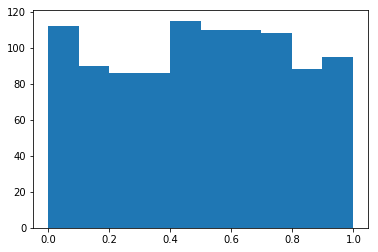

In [17]:
x = np.random.rand(1000)
plt.hist(x)
plt.show()

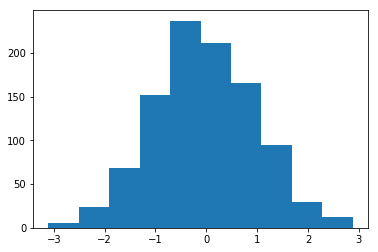

In [18]:
x = np.random.randn(1000)
plt.hist(x)
plt.show()

In [19]:
# 0-dim: scalar
scalar = np.array(87)
print(type(scalar))
print(scalar.ndim)
print(scalar.shape)

<class 'numpy.ndarray'>
0
()


In [20]:
# 1-dim: vector
vector = np.array([87,78,5566])
print(type(vector))
print(vector.ndim)
print(vector.shape)

<class 'numpy.ndarray'>
1
(3,)


In [21]:
# 2-dim: metric
metrix = np.array([
    [1,2],
    [3,4],
    [5,6]
])
print(type(metrix))
print(metrix.ndim)
print(metrix.shape)
print(metrix)

<class 'numpy.ndarray'>
2
(3, 2)
[[1 2]
 [3 4]
 [5 6]]


In [22]:
# 3-dim: tensor
tensor = np.arange(24).reshape(2, 3, 4)
print(type(tensor))
print(tensor.ndim)
print(tensor.shape)
print(tensor)


<class 'numpy.ndarray'>
3
(2, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [23]:
tickers = [i.split()[0] for i in ticker_names]
companies = [i.split()[1] for i in ticker_names]
print(tickers)
print(companies)

['3008', '6409', '2207', '5269', '6415', '1476', '6669', '3563', '3406', '1590', '2059', '2912', '2454', '8341', '2231', '4137', '2227', '8454', '9910', '2327', '2049', '2395', '2330', '8462', '8464', '6452', '9921', '1477', '3443', '2357', '1707', '3533', '2379', '2474', '6414', '3665', '2723', '6666', '9914', '3034', '1256', '6670', '3130', '8422', '6504', '2492', '1537', '2707', '2439', '8070', '4438', '4766', '6230', '4763', '4536', '2404', '5288', '1558', '8482', '2308', '4943', '1723', '2360', '3454', '8480', '8016', '4912', '2345', '3045', '5871', '6505', '3376', '9941', '1232', '2239', '3413', '2412', '1301', '3023', '1326', '6176', '3532', '6533', '6552', '3653', '6271', '4551', '8114', '2939', '4190', '3026', '1760', '6581', '8499', '3044', '4119', '3617', '2373', '6456', '6213']
['大立光', '旭隼', '和泰車', '祥碩', '矽力-KY', '儒鴻', '緯穎', '牧德', '玉晶光', '亞德客-KY', '川湖', '統一超', '聯發科', '日友', '為升', '麗豐-KY', '裕日車', '富邦媒', '豐泰', '國巨', '上銀', '研華', '台積電', '柏文', '億豐', '康友-KY', '巨大', '聚陽', '創意', '華碩

In [24]:
def get_ticker(x):
    return x.split()[0]
def get_companies(x):
    return x.split()[1]
print(list(map(get_ticker, ticker_names))) # Mapping func to ticker_names
print(list(map(get_companies, ticker_names)))

['3008', '6409', '2207', '5269', '6415', '1476', '6669', '3563', '3406', '1590', '2059', '2912', '2454', '8341', '2231', '4137', '2227', '8454', '9910', '2327', '2049', '2395', '2330', '8462', '8464', '6452', '9921', '1477', '3443', '2357', '1707', '3533', '2379', '2474', '6414', '3665', '2723', '6666', '9914', '3034', '1256', '6670', '3130', '8422', '6504', '2492', '1537', '2707', '2439', '8070', '4438', '4766', '6230', '4763', '4536', '2404', '5288', '1558', '8482', '2308', '4943', '1723', '2360', '3454', '8480', '8016', '4912', '2345', '3045', '5871', '6505', '3376', '9941', '1232', '2239', '3413', '2412', '1301', '3023', '1326', '6176', '3532', '6533', '6552', '3653', '6271', '4551', '8114', '2939', '4190', '3026', '1760', '6581', '8499', '3044', '4119', '3617', '2373', '6456', '6213']
['大立光', '旭隼', '和泰車', '祥碩', '矽力-KY', '儒鴻', '緯穎', '牧德', '玉晶光', '亞德客-KY', '川湖', '統一超', '聯發科', '日友', '為升', '麗豐-KY', '裕日車', '富邦媒', '豐泰', '國巨', '上銀', '研華', '台積電', '柏文', '億豐', '康友-KY', '巨大', '聚陽', '創意', '華碩

In [25]:
# lambda 函數用在用完即丟的 function
# functional programming
tickers = list(map(lambda x: x.split()[0], ticker_names))
companies = list(map(lambda x: x.split()[1], ticker_names))
print(tickers)
print(companies)

['3008', '6409', '2207', '5269', '6415', '1476', '6669', '3563', '3406', '1590', '2059', '2912', '2454', '8341', '2231', '4137', '2227', '8454', '9910', '2327', '2049', '2395', '2330', '8462', '8464', '6452', '9921', '1477', '3443', '2357', '1707', '3533', '2379', '2474', '6414', '3665', '2723', '6666', '9914', '3034', '1256', '6670', '3130', '8422', '6504', '2492', '1537', '2707', '2439', '8070', '4438', '4766', '6230', '4763', '4536', '2404', '5288', '1558', '8482', '2308', '4943', '1723', '2360', '3454', '8480', '8016', '4912', '2345', '3045', '5871', '6505', '3376', '9941', '1232', '2239', '3413', '2412', '1301', '3023', '1326', '6176', '3532', '6533', '6552', '3653', '6271', '4551', '8114', '2939', '4190', '3026', '1760', '6581', '8499', '3044', '4119', '3617', '2373', '6456', '6213']
['大立光', '旭隼', '和泰車', '祥碩', '矽力-KY', '儒鴻', '緯穎', '牧德', '玉晶光', '亞德客-KY', '川湖', '統一超', '聯發科', '日友', '為升', '麗豐-KY', '裕日車', '富邦媒', '豐泰', '國巨', '上銀', '研華', '台積電', '柏文', '億豐', '康友-KY', '巨大', '聚陽', '創意', '華碩

In [26]:
non_ky_companies = [i for i in companies if 'KY' not in i]
ky_companies = [i for i in companies if 'KY' in i]

In [27]:
# filter
non_ky_companies = list(filter(lambda x: 'KY' not in x, companies))
ky_companies = list(filter(lambda x: 'KY' in x, companies))

## Boolean filtering

In [28]:
import numpy as np
import pandas as pd

companies_ser = pd.Series(companies)
listed_in_KY = companies_ser.str.contains("KY").values
companies_arr = np.array(companies)
companies_arr[listed_in_KY]

array(['矽力-KY', '亞德客-KY', '麗豐-KY', '康友-KY', '貿聯-KY', '美食-KY', '羅麗芬-KY',
       '鮮活果汁-KY', '材料-KY', '豐祥-KY', '商億-KY', '康控-KY', '泰昇-KY', '聯德控股-KY',
       '中租-KY', '英利-KY', '凱羿-KY', '佐登-KY', '鼎炫-KY', 'GIS-KY'], dtype='<U7')

In [29]:
companies_arr[~listed_in_KY]

array(['大立光', '旭隼', '和泰車', '祥碩', '儒鴻', '緯穎', '牧德', '玉晶光', '川湖', '統一超',
       '聯發科', '日友', '為升', '裕日車', '富邦媒', '豐泰', '國巨', '上銀', '研華', '台積電',
       '柏文', '億豐', '巨大', '聚陽', '創意', '華碩', '葡萄王', '嘉澤', '瑞昱', '可成', '樺漢',
       '美利達', '聯詠', '復盛應用', '一零四', '可寧衛', '南六', '華新科', '廣隆', '晶華', '美律',
       '長華', '廣越', '南寶', '超眾', '拓凱', '漢唐', '伸興', '台達電', '中碳', '致茂', '晶睿',
       '矽創', '智邦', '台灣大', '台塑化', '新日興', '裕融', '大統益', '京鼎', '中華電', '台塑',
       '信邦', '台化', '瑞儀', '台勝科', '晶心科', '易華電', '健策', '同欣電', '智伸科', '振樺電',
       '禾伸堂', '寶齡富錦', '鋼聯', '健鼎', '旭富', '碩天', '震旦行', '聯茂'], dtype='<U7')

In [30]:
np.array(prices)[listed_in_KY]

array([465. , 331.5, 271. , 229. , 194.5, 185. , 180. , 175. , 149. ,
       145. , 142. , 134.5, 128.5, 119. , 116.5, 113.5, 100. ,  99.1,
        95.1,  94.2])

In [31]:
np.array(prices)[~listed_in_KY]

array([4085. ,  606. ,  486.5,  473. ,  420. ,  370. ,  366. ,  351.5,
        308.5,  306.5,  287.5,  279. ,  272. ,  264. ,  263. ,  259.5,
        253.5,  245. ,  243. ,  238. ,  232. ,  230. ,  228.5,  221. ,
        218.5,  217.5,  216.5,  216. ,  211. ,  206.5,  205. ,  180. ,
        178. ,  172. ,  170. ,  168.5,  164. ,  164. ,  163. ,  161. ,
        161. ,  161. ,  158.5,  156.5,  152. ,  147. ,  145.5,  144. ,
        140.5,  133. ,  130. ,  129. ,  124. ,  119. ,  117. ,  116. ,
        115. ,  115. ,  114. ,  112. ,  112. ,  110. ,  109.5,  107. ,
        104.5,  104. ,  103. ,  102.5,  102. ,  102. ,  102. ,  102. ,
         97.6,   96. ,   95.5,   94.8,   94.5,   94.3,   94.3,   93. ])

In [32]:
cities = ["Taipei", "Boston", "London", "Reykjavik", "Tokyo" ]
continents = ["Asia", "North America", "Europe", "Europe", "Asia"]
current_temps = [27, 9, 6, 2, 24]

In [33]:
# 使用 ndarray boolean filtering
# 把歐洲的城市篩選出來
# 把氣溫低於攝氏 10 度的城市篩選出來
in_europe = np.array(continents) == "Europe"
print(np.array(cities)[in_europe])
lower_than_ten = np.array(current_temps) < 10
print(np.array(cities)[lower_than_ten])

['London' 'Reykjavik']
['Boston' 'London' 'Reykjavik']


In [34]:
print(np.array(cities)[np.array(continents) == "Europe"])
print(np.array(cities)[np.array(current_temps) < 10])

['London' 'Reykjavik']
['Boston' 'London' 'Reykjavik']


## 不規則的 Slicing

In [35]:
np.array(cities)[[0, 1, 4]] # non-european cities

array(['Taipei', 'Boston', 'Tokyo'], dtype='<U9')

In [36]:
A = [
    [1, 2],
    [3, 4]
]

B = [
    [5, 6],
    [7, 8]
]
#C = AB # matrix multiply
C = [
    [0, 0],
    [0, 0]
]
for i in range(len(A)):
    for k in range(len(B[0])):
        for j in range(len(B)):
            C[i][j] += A[i][k] * B[k][j]
print(C)

[[19, 22], [43, 50]]


In [37]:
A_arr = np.array(A)
print(A_arr.shape)
B_arr = np.array(B)
C_arr = A_arr.dot(B_arr) #np.dot() 支援矩陣運算
print(C_arr)

(2, 2)
[[19 22]
 [43 50]]


## 隱性的型別轉換

In [38]:
mixed_list = [True, False, 87, 8.7, '5566']
for i in mixed_list:
    print(type(i))

<class 'bool'>
<class 'bool'>
<class 'int'>
<class 'float'>
<class 'str'>


In [39]:
mixed_arr = np.array([True, False])
for i in mixed_arr:
    print(type(i))

<class 'numpy.bool_'>
<class 'numpy.bool_'>


In [40]:
mixed_arr = np.array([True, False, 87])
for i in mixed_arr:
    print(type(i))
print(mixed_arr)

<class 'numpy.int32'>
<class 'numpy.int32'>
<class 'numpy.int32'>
[ 1  0 87]


In [41]:
mixed_arr = np.array([True, False, 87, 8.7])
for i in mixed_arr:
    print(type(i))
print(mixed_arr)

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
[ 1.   0.  87.   8.7]


In [42]:
mixed_arr = np.array([True, False, 87, 8.7, "Luke Skywalker"])
for i in mixed_arr:
    print(type(i))
print(mixed_arr)

<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
<class 'numpy.str_'>
['True' 'False' '87' '8.7' 'Luke Skywalker']


In [43]:
# ndarray 的練習1
'''
轉置 u 後再去與 v 做運算
'''

u = np.array([[4],[-4],[-3]])
v = np.array([[4], [2], [4]])
print(u.T.dot(v))

[[-4]]


In [44]:
# ndarray 的練習2
'''
練習計算 AI 與 IA

'''
A = np.arange(1, 10).reshape(3, 3)
print(A.dot(np.eye(3)))
print(np.eye(3).dot(A))

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


In [45]:
# ndarray 的練習3
'''
練習計算 AB 與 BA
A = np.array([
    [1,2],
    [4,5]
])
B = np.array([
    [4,3],
    [2,1]
])
'''
A = np.array([1, 2 ,4 ,5]).reshape(2, 2)
B = np.arange(4, 0, -1).reshape(2, 2)
print(A.dot(B))
print(B.dot(A))

[[ 8  5]
 [26 17]]
[[16 23]
 [ 6  9]]


## 常用屬性與方法
- 元素個數：`.size`
- 外觀：`.shape`
- 維度：`.ndim`
- 變形：`.reshape(m, n)`
- 轉置：`.T`
- 攤平：`.ravel()`
- 依條件取代：`.where()`
- 相乘：`.prod()`
- 加總：`.sum()`
- 平均：`.mean()`

In [46]:
my_arr = np.arange(20).reshape(4, 5)
print(my_arr)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


In [47]:
my_arr.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [48]:
my_arr.size

20

In [49]:
my_arr.shape

(4, 5)

In [50]:
my_arr.T

array([[ 0,  5, 10, 15],
       [ 1,  6, 11, 16],
       [ 2,  7, 12, 17],
       [ 3,  8, 13, 18],
       [ 4,  9, 14, 19]])

In [51]:
np.where(my_arr >= 10, 999, my_arr)

array([[  0,   1,   2,   3,   4],
       [  5,   6,   7,   8,   9],
       [999, 999, 999, 999, 999],
       [999, 999, 999, 999, 999]])

In [52]:
my_arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])

In [53]:
my_arr.sum()

190

In [54]:
my_arr.sum(axis=0)

array([30, 34, 38, 42, 46])

In [55]:
my_arr.sum(axis=1)

array([10, 35, 60, 85])

In [56]:
my_arr.max()

19

In [57]:
my_arr.max(axis=0)

array([15, 16, 17, 18, 19])

In [58]:
my_arr.max(axis=1)

array([ 4,  9, 14, 19])

In [59]:
my_arr[:, 4]

array([ 4,  9, 14, 19])

In [60]:
my_arr[:, [1, 2, 4]]

array([[ 1,  2,  4],
       [ 6,  7,  9],
       [11, 12, 14],
       [16, 17, 19]])

In [61]:
my_arr[[0, 1, 3], :]

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [15, 16, 17, 18, 19]])

In [62]:
my_arr[my_arr % 3 == 0]

array([ 0,  3,  6,  9, 12, 15, 18])